In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Preprocessing

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
X_df = df[df.columns[1:]]

y_df = pd.DataFrame(df['Bankrupt?'])
y_df.columns = ['Bankrupt?']

In [5]:
X_df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [6]:
y_df

,Bankrupt?
0,1
1,1
2,1
3,1
4,1
...,...
6814,0
6815,0
6816,0
6817,0


## 1.1 Check missing Values and categorical values

In [7]:
# check if there are missing values

print('Missing values in X_df: {}'.format(X_df.isnull().values.any()))
print('Missing values in y_df: {}'.format(y_df.isnull().values.any()))



Missing values in X_df: False
Missing values in y_df: False


In [8]:
# check if there are categorical features

numCols = X_df.select_dtypes("number").columns
catCols = X_df.select_dtypes("object").columns

numCols= list(set(numCols))
catCols= list(set(catCols))

print('Number of numerical features: {}'.format(len(numCols)))
print('Number of categorical features: {}'.format(len(catCols)))


Number of numerical features: 95
Number of categorical features: 0


## 1.2 Feature Scaling

In [9]:
# features scaling preserving the flag features

from sklearn.preprocessing import StandardScaler

def get_scaling(X_df, flag_features):
    
    '''
    The function takes in input the original dataframe X_df and
    a list of index corresponding to the flag features 
    (i.e., features with values 0,1,2 etc., for example obtained 
    with One Hot Encoder if categorical in the original dataframe).

    First, the function scales all the features.

    The flag features should not be scaled: thus, the function
    drops all the flag features in a for loop from the scaled dataframe.

    Then, the flag features from the original dataframe are added to the
    scaled dataframe with their original values.
    '''
    
    sc = StandardScaler()

    X_scaled = pd.DataFrame(sc.fit_transform(X_df))

    X_scaled.columns = X_df.columns
    
    X_flag = []
    flag_names = []
    
    for flg_ftrs in flag_features:
        
        X_scaled = X_scaled.drop([X_df.columns[flg_ftrs]],axis = 1)
        
        print('Flag feature with index {}: {}'.format(flg_ftrs,X_df.columns[flg_ftrs]))
        
        X_flag.append(pd.DataFrame(X_df.values[:,flg_ftrs]))
        flag_names.append(X_df.columns[flg_ftrs])
        
    X_flag = pd.concat(X_flag, axis = 1)
    X_flag.columns = flag_names
    
    X_scaled = pd.concat([X_scaled, X_flag],axis = 1)
    
    return X_scaled


In [10]:
# flag features 84: Liability-Assets Flag
# flag features 93: Net Income Flag

X_scaled = get_scaling(X_df, flag_features = [84,93])

#X_scaled = X_df

Flag feature with index 84:  Liability-Assets Flag
Flag feature with index 93:  Net Income Flag


In [11]:
X_scaled

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Liability-Assets Flag,Net Income Flag
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,0.0,1.0
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573,0.0,1.0
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,-0.621960,0.0,1.0
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826,0.0,1.0
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,0.016277,...,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,-0.353693,0.0,1.0
6815,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,0.016145,...,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,-0.185856,0.0,1.0
6816,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,0.013012,...,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,1.001206,0.0,1.0
6817,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,0.022233,...,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,-0.071364,0.0,1.0


## 1.3 Visualize data distribution

(array([6599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         220.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

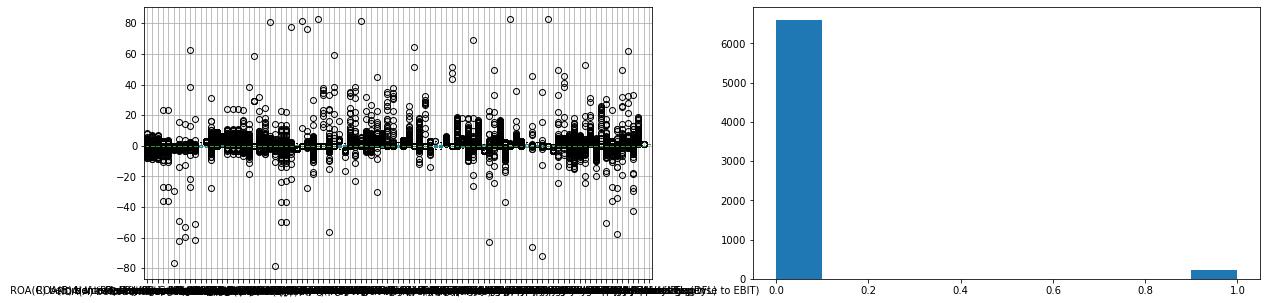

In [12]:
# features distribution after scaling

fig = plt.figure(figsize = (20,5))

ax = fig.add_subplot(1,2,1)
X_scaled.boxplot()

ax = fig.add_subplot(1,2,2)
plt.hist(y_df)

The dataset is **clearly imbalanced** because the majority of the instances belong to the negative class 0 (Not Bankrupted). We can visualize the imbalance also in a scatter plot.

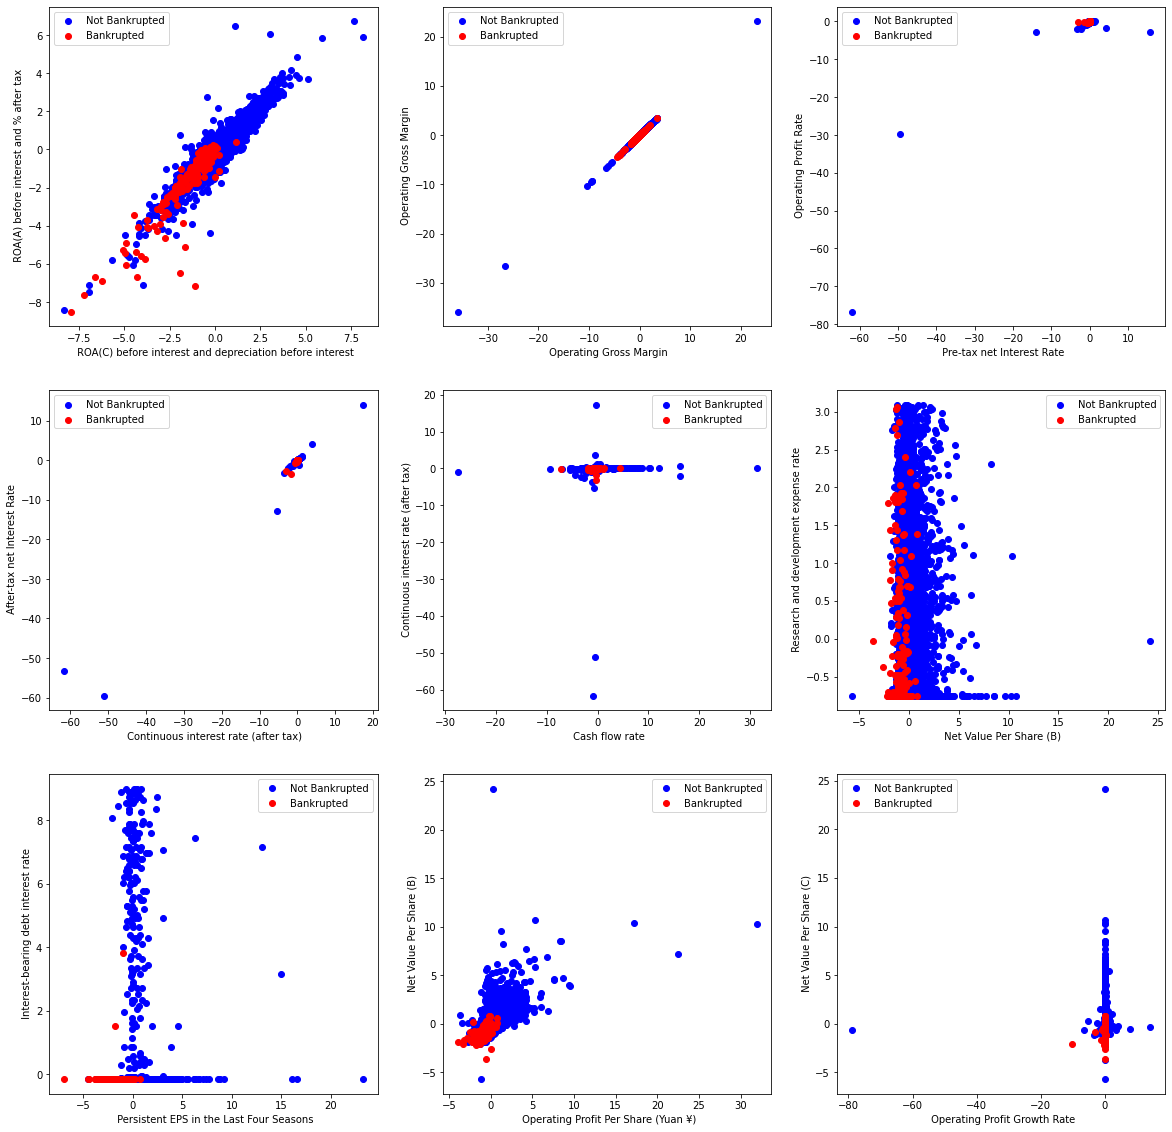

In [13]:
fig = plt.figure(figsize = (20,20))

for i in range(9):
    
    fig.add_subplot(3,3,i+1)
    
    ax_1 = 3*i
    ax_2 = 2*i+1

    plt.scatter(X_scaled.values[np.where(y_df == 0),ax_1],X_scaled.values[np.where(y_df == 0),ax_2], c = 'b')
    plt.scatter(X_scaled.values[np.where(y_df == 1),ax_1],X_scaled.values[np.where(y_df == 1),ax_2], c = 'r')
    plt.xlabel(X_scaled.columns[ax_1])
    plt.ylabel(X_scaled.columns[ax_2])
    plt.legend(['Not Bankrupted','Bankrupted'])


    



### 1.3.1 Dealing with Imbalanced Dataset

There are different techniques to deal with **imbalanced datasets** (https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). In particular one can:

**1) Resampling the dataset**: Adding copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement), or deleting instances from the over-represented class, called under-sampling.**

**2) Generating synthetic samples from the minority class.** The most popular of such algorithms is called **SMOTE or the Synthetic Minority Over-sampling Technique.** SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.**


In this example, we use the **SMOTE algorithm (generation of synthetic samples from the minority class**.

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_scaled, y_df)

Text(0.5, 1.0, 'SMOTE Dataset')

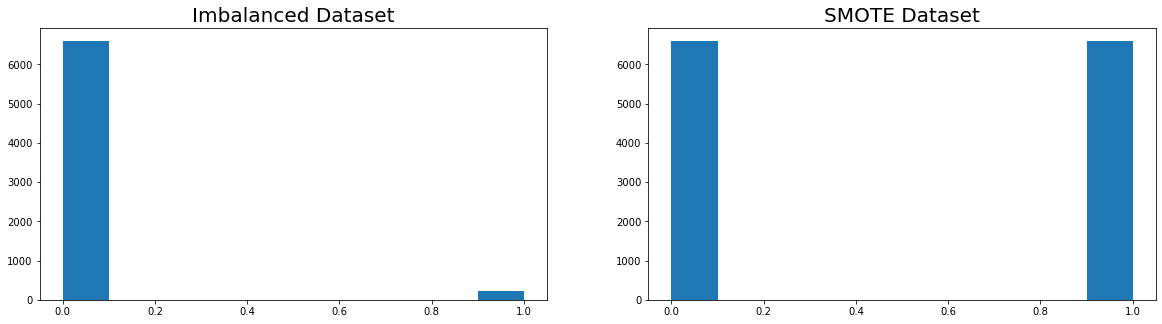

In [15]:
# data distribution before and after SMOTE

fig = plt.figure(figsize = (20,5))

ax = fig.add_subplot(1,2,1)
plt.hist(y_df)
plt.title('Imbalanced Dataset',fontsize  = 20)

ax = fig.add_subplot(1,2,2)
plt.hist(y_smote)
plt.title('SMOTE Dataset',fontsize  = 20)


Text(0.5, 1.0, 'y before removing outliers')

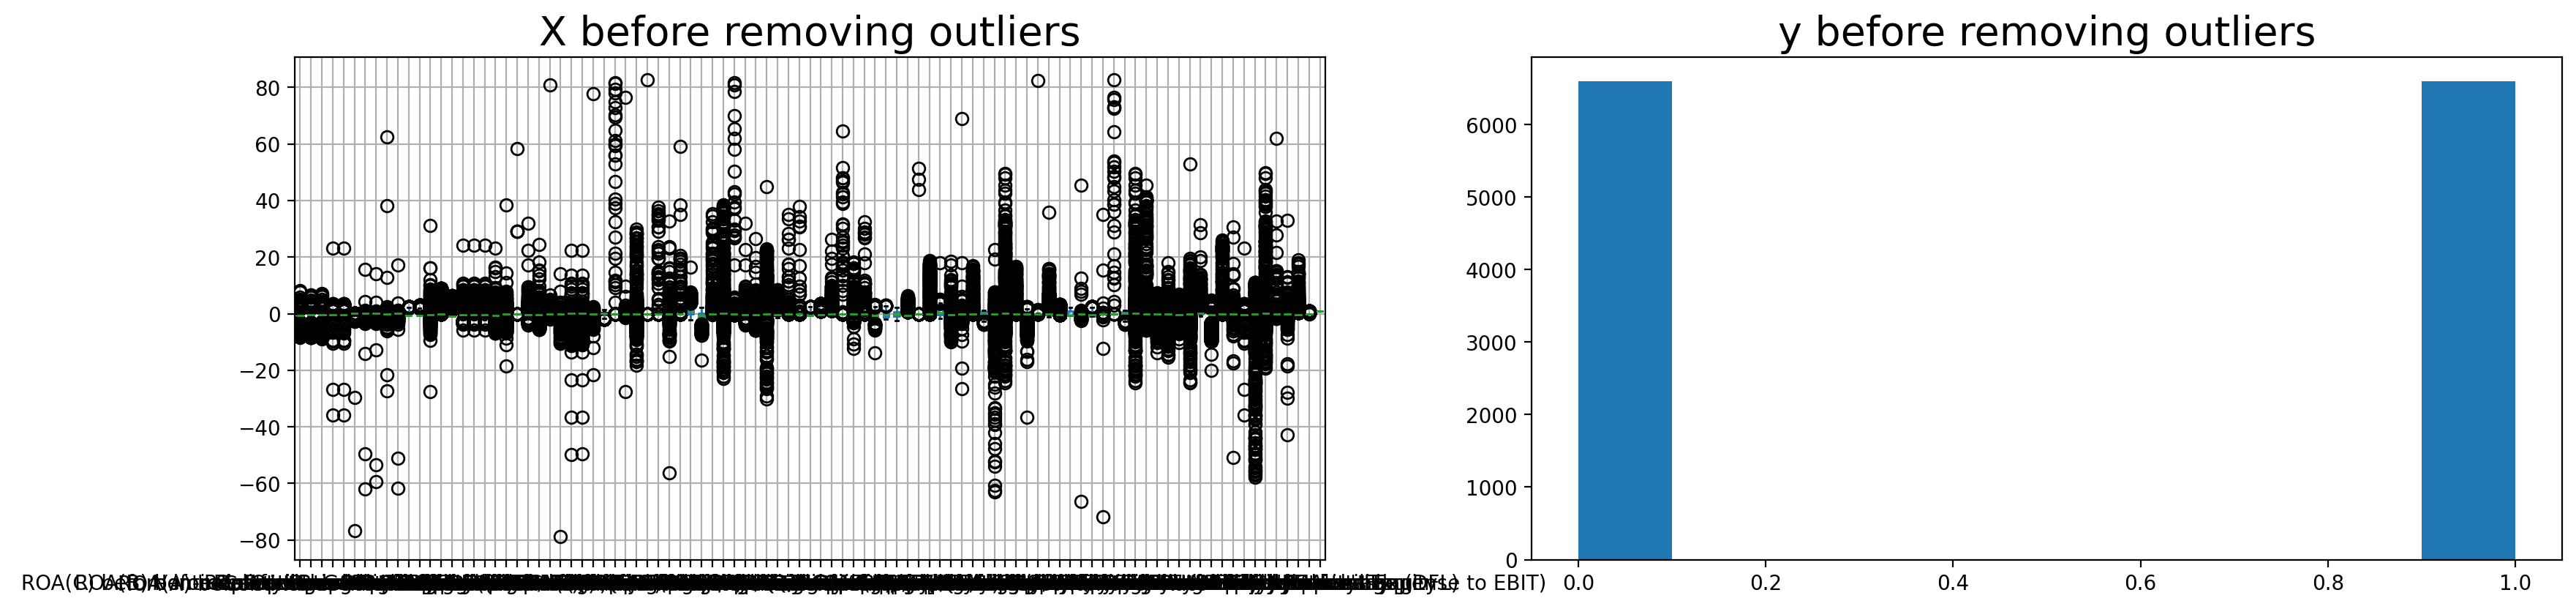

In [16]:
# data distribution after removing outliers

fig = plt.figure(figsize = (20,10), dpi = 200)

ax = fig.add_subplot(2,2,1)
X_smote.boxplot()
plt.title('X before removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,2)
plt.hist(y_smote)
plt.title('y before removing outliers', fontsize = 20)

Looking at the features boxplots we can see that we have many ouliers which are very far from the main distributions. These outliers should be removed since they are considered as noisy data.

### 1.3.2 Removing Outliers

In [17]:
# function to remove the outliers from the dataset (data which fall outside of the whiskers in the box plot)
# the outliers are removed for each feature separately. It can happen that data that are outliers
# for a certain feature are not outliers for another feature. 
# The threshold to consider data outliers or not is defined by q. 

# upper quartile or 75h percentile (Q3): value for which 75% of the data are less than this value (upper threshold of the box)
# lower quartile or 25th percentile (Q1): value for which 25% of the data are less than this value (lower theshold of the box)
# iqr: distance between the upper and lower quartile: Q3 - Q1

# upper whisker: Q3 + q*iqr
# lower whisler: Q1 - q*iqr

# data > upper whisker or < lower whisker : outliers

# q controls the amount of data to consider as outliers

def get_remove_outliers(X,y,q):
    
    data = np.column_stack((X.values,y.values))
    
    for j in range(data.shape[1]):
    
        median = np.median(data[:,j])
        
        upper_quartile = np.percentile(data[:,j], 75)
        lower_quartile = np.percentile(data[:,j], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = (data[:,j][data[:,j] <= upper_quartile + q * iqr]).max()
        lower_whisker = (data[:,j][data[:,j] >= lower_quartile - q * iqr]).min()
        
        data_clean = data[data[:,j] <= upper_whisker]
        data_clean = data_clean[data_clean[:,j] >= lower_whisker]
        
        data = data_clean
        
        
    X_clean = pd.DataFrame(data_clean[:,:data_clean.shape[1] - 1])
    X_clean.columns = X.columns
    
    y_clean = pd.DataFrame(data_clean[:,data_clean.shape[1] - 1])
    y_clean.columns = y.columns
    
    return X_clean,y_clean

In [18]:
q = 10

X_clean, y_clean = get_remove_outliers(X_smote,y_smote, q)

fraction_removed_outliers =  1 - X_clean.shape[0] / X_scaled.shape[0]

print('Removed {:.1f} % data'.format(fraction_removed_outliers * 100))

Removed 13.6 % data


Text(0.5, 1.0, 'y after removing outliers')

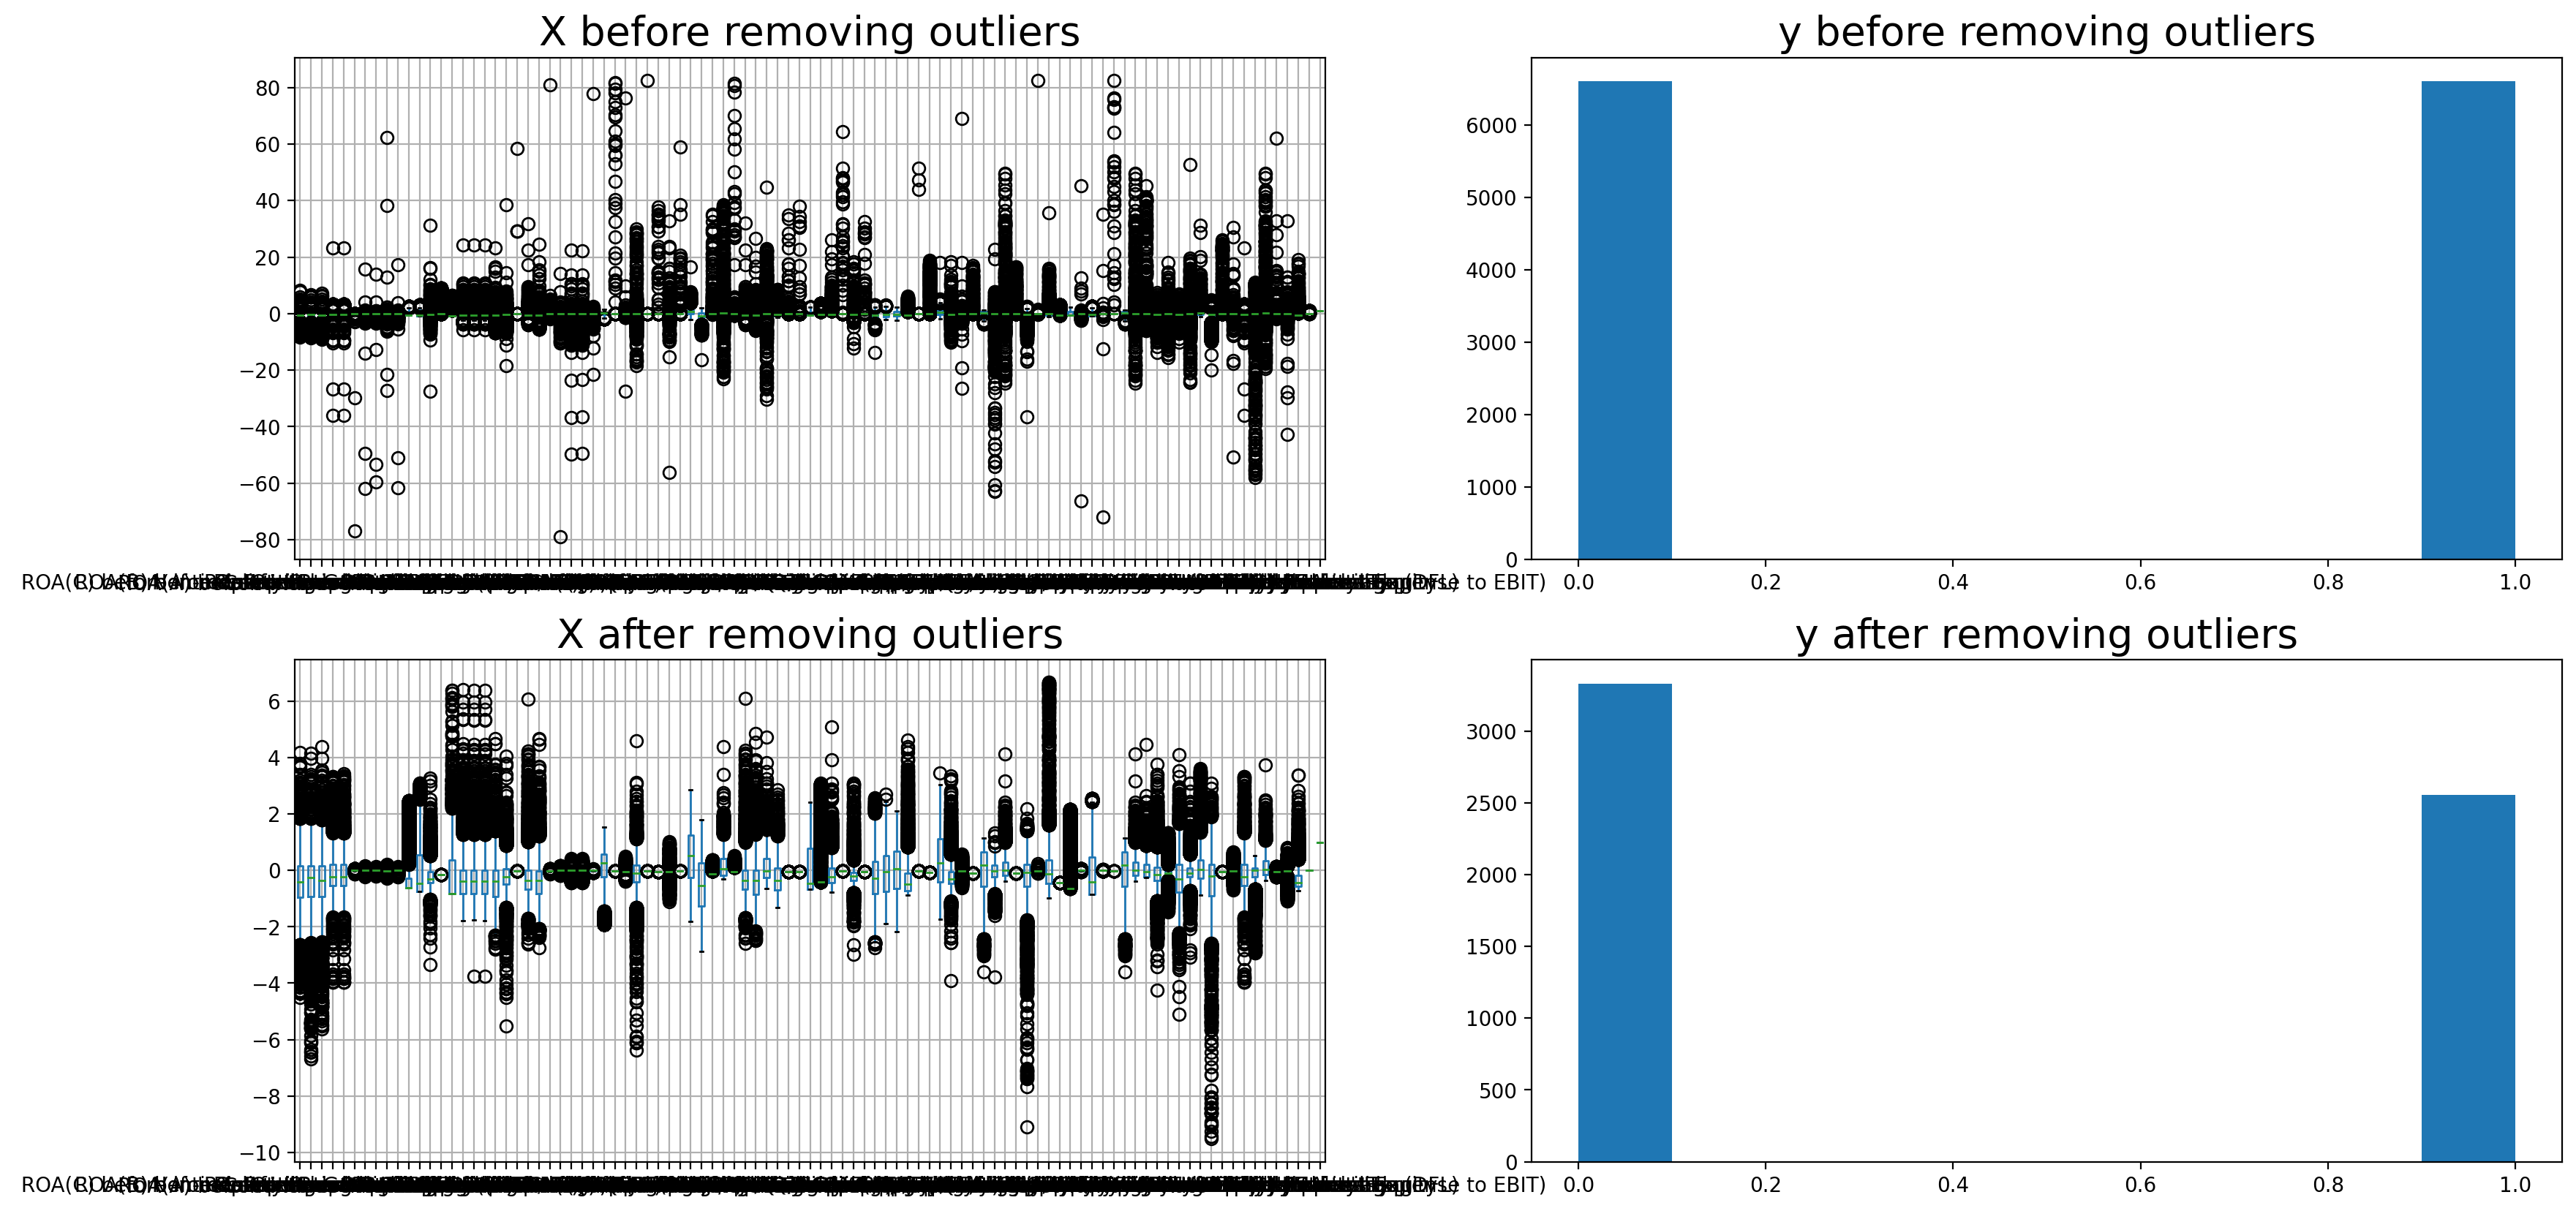

In [19]:
# data distribution after removing outliers

fig = plt.figure(figsize = (20,10), dpi = 200)

ax = fig.add_subplot(2,2,1)
X_smote.boxplot()
plt.title('X before removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,2)
plt.hist(y_smote)
plt.title('y before removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,3)
X_clean.boxplot()
plt.title('X after removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,4)
plt.hist(y_clean)
plt.title('y after removing outliers', fontsize = 20)

Removing 13.6% of the outliers we obtain features distributions which are closer to the mean. Before removing the outliers, we had huge variance, for example some features were from -80 to +80. After removing the outliers, the features range is concentrated between -9 and +6. Removing the outliers has resulted in having a low imbalance of the negative class, but compared to the original imbalance rate, this scenario is more than acceptable.

Let's visualize the boxplots and the histogram of a smaller set of features for a more clear representation.

Text(0.5, 1.0, 'X before removing outliers Boxplot')

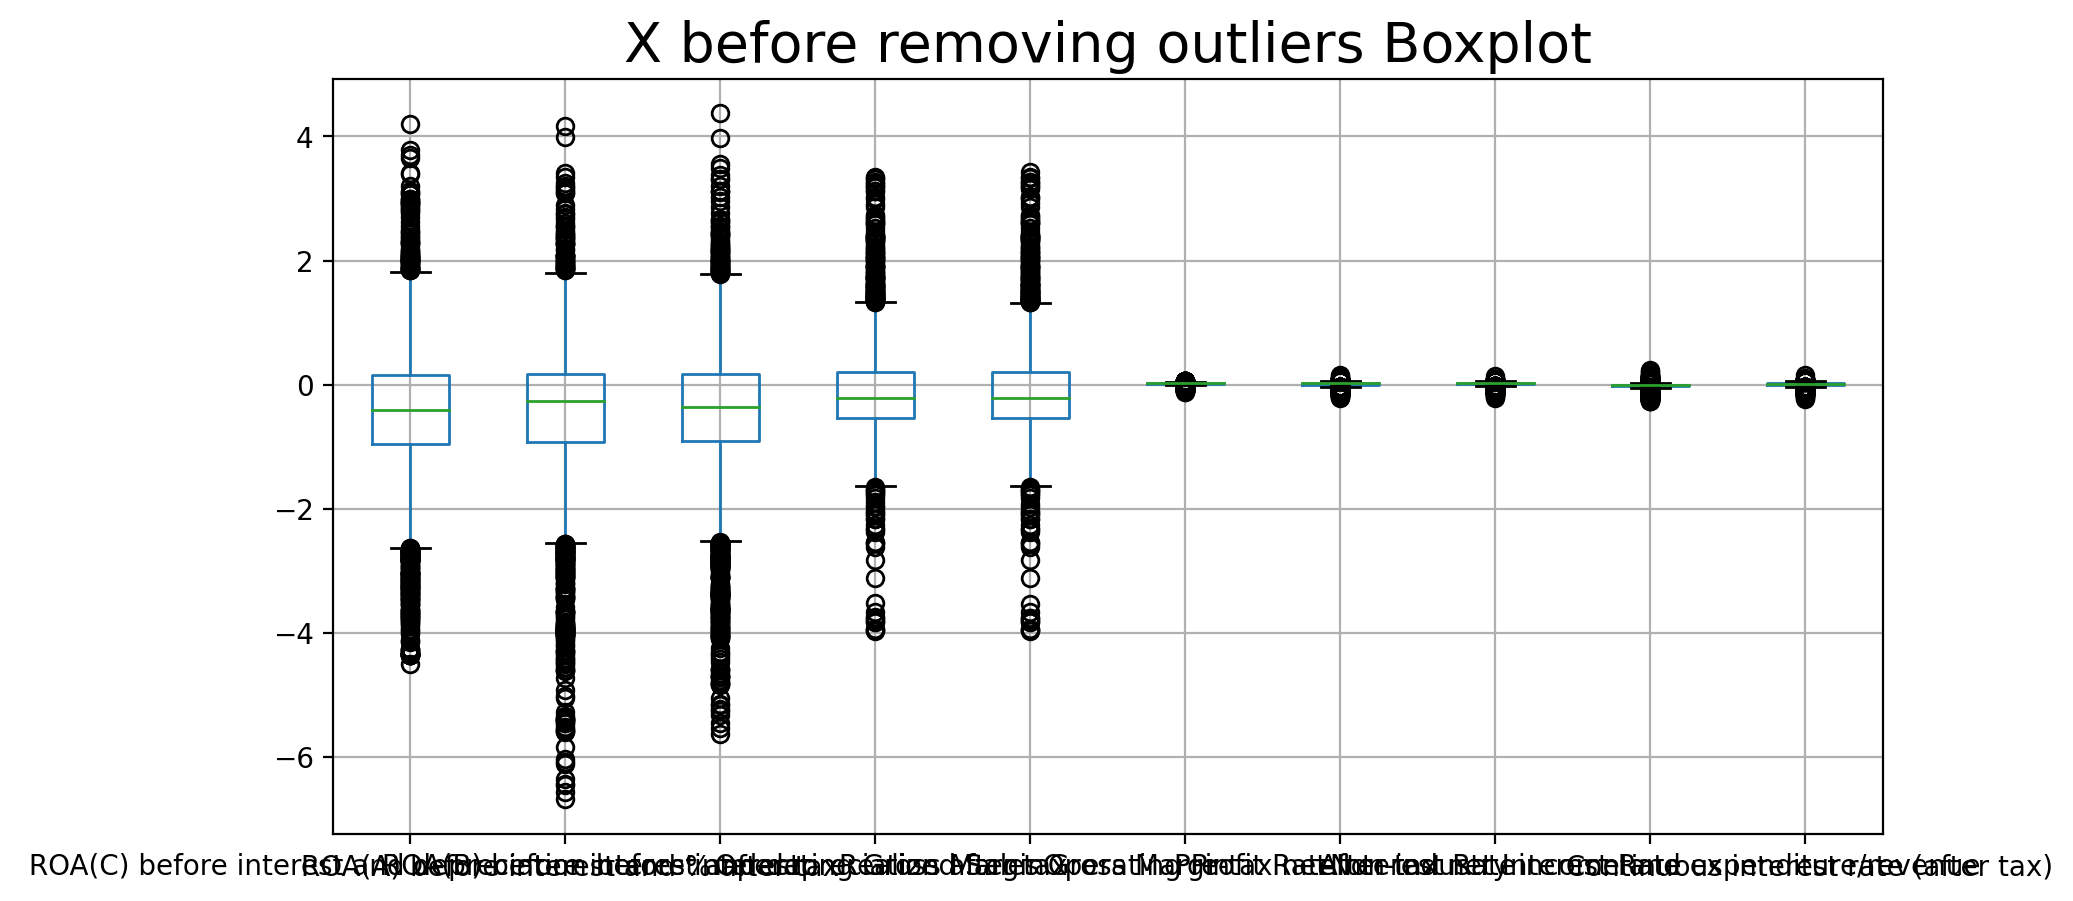

<Figure size 2000x2000 with 0 Axes>

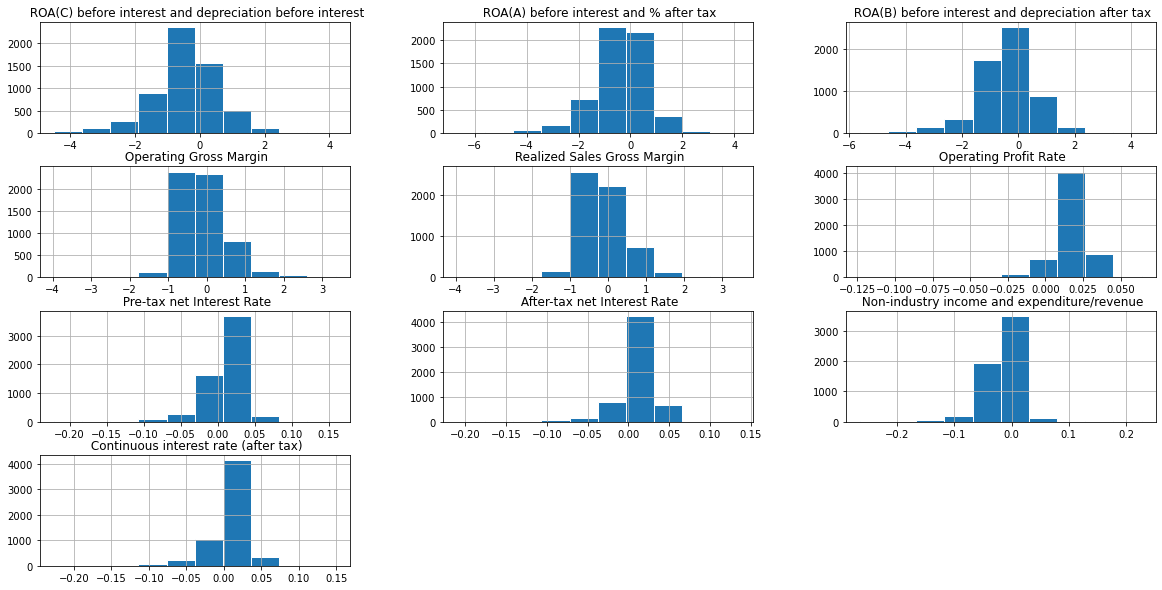

In [20]:
features = 10
fig = plt.figure(figsize = (10,5), dpi = 200)


X_clean[X_clean.columns[:features]].boxplot()
plt.title('X before removing outliers Boxplot', fontsize = 20)

fig = plt.figure(figsize = (10,10), dpi = 200)

X_clean[X_clean.columns[:features]].hist(figsize = (20,10), edgecolor='white')
plt.title('X before removing outliers Boxplot', fontsize = 20)

We can visualize the stastical parameters (mean,std,min, lower whisker (25%), mean (50%), upper whisker (75%) and max:

In [21]:
X_clean.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Liability-Assets Flag,Net Income Flag
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5.891000e+03,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.0,5891.0
mean,-0.439963,-0.427161,-0.448633,-0.121469,-0.120617,0.016762,0.010705,0.011769,-0.019302,0.008815,...,-4.949072e-02,-0.022196,-0.121470,-0.119714,0.139199,-0.045846,-0.055367,-0.287327,0.0,1.0
std,1.033561,1.085647,1.069947,0.647454,0.645570,0.013606,0.027640,0.024393,0.032741,0.026748,...,2.165690e-11,0.111828,0.647459,0.368318,0.391963,0.033296,0.191253,0.422051,0.0,0.0
min,-4.512340,-6.685868,-5.631284,-3.967007,-3.970070,-0.123328,-0.221242,-0.210466,-0.264749,-0.226727,...,-4.949072e-02,-0.687585,-3.966977,-2.917529,-0.360606,-0.236825,-1.081246,-0.714444,0.0,1.0
25%,-0.958239,-0.926431,-0.915642,-0.534428,-0.532875,0.011561,0.000892,0.003213,-0.025758,0.000351,...,-4.949072e-02,-0.043386,-0.534404,-0.213777,-0.154396,-0.057421,-0.079339,-0.559316,0.0,1.0
50%,-0.409519,-0.257642,-0.361150,-0.223129,-0.224142,0.018232,0.017410,0.018312,-0.013840,0.016122,...,-4.949072e-02,-0.010555,-0.223141,-0.003990,0.037879,-0.047803,-0.014827,-0.429688,0.0,1.0
75%,0.156130,0.166232,0.163864,0.209977,0.209193,0.023565,0.025392,0.024721,-0.006801,0.023115,...,-4.949072e-02,0.013866,0.209989,0.084339,0.338601,-0.041459,0.017790,-0.180679,0.0,1.0
max,4.196213,4.162010,4.380493,3.339965,3.434465,0.063850,0.159568,0.135186,0.227024,0.148923,...,-4.949072e-02,0.657912,3.339930,0.525804,3.745601,0.139016,0.811801,3.382875,0.0,1.0


Visualizing the data into a scatter plot we can realize that we have sufficient balance between the two classes now.

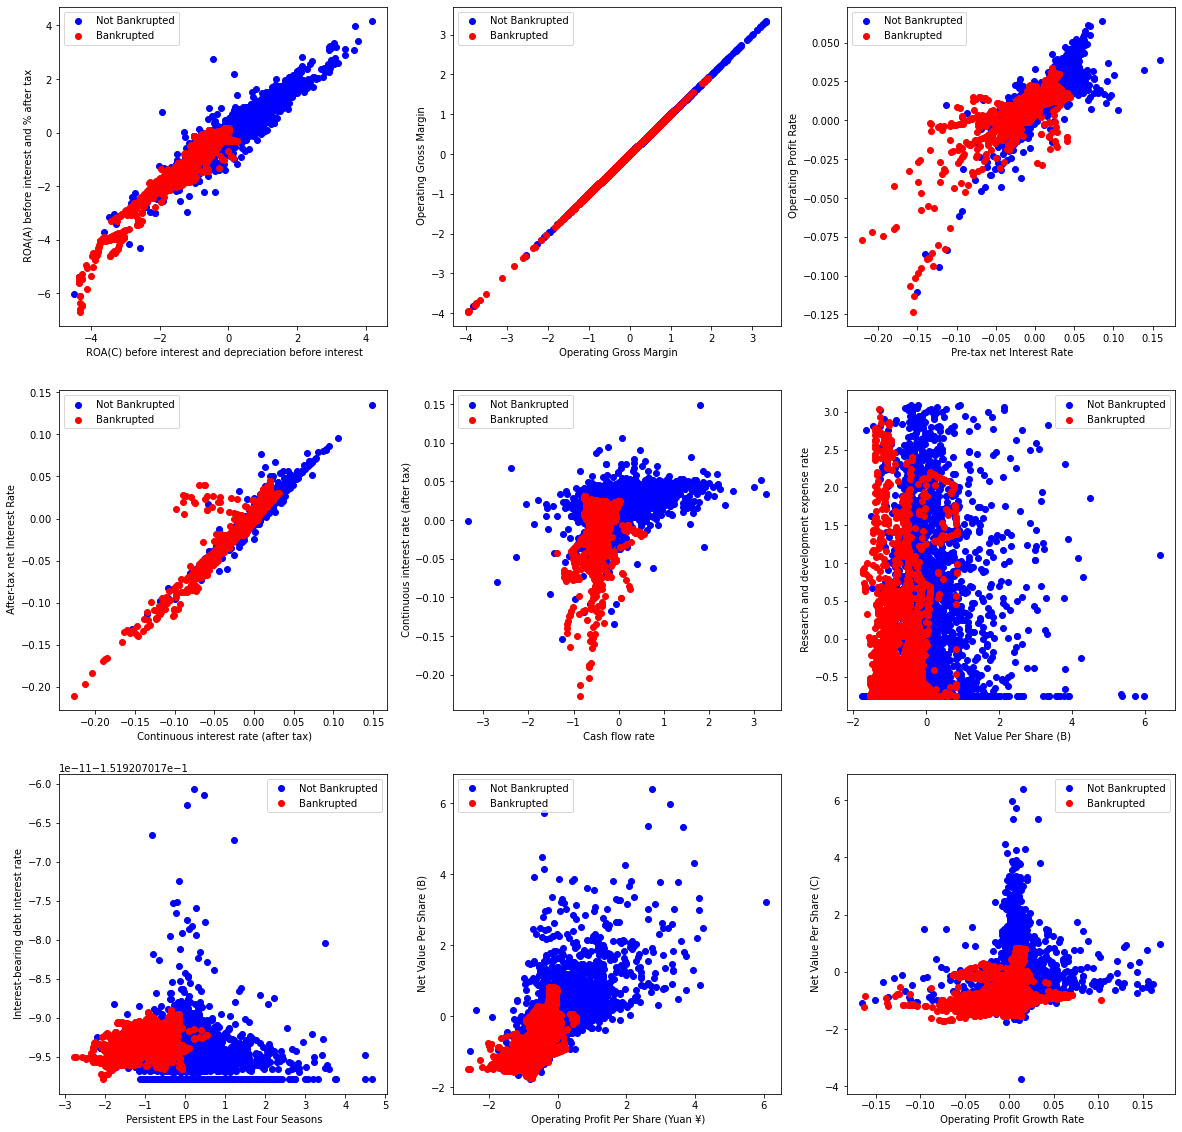

In [22]:
fig = plt.figure(figsize = (20,20))

for i in range(9):
    
    fig.add_subplot(3,3,i+1)
    
    ax_1 = 3*i
    ax_2 = 2*i+1

    plt.scatter(X_clean.values[np.where(y_clean == 0),ax_1],X_clean.values[np.where(y_clean == 0),ax_2], c = 'b')
    plt.scatter(X_clean.values[np.where(y_clean == 1),ax_1],X_clean.values[np.where(y_clean == 1),ax_2], c = 'r')
    plt.xlabel(X_clean.columns[ax_1])
    plt.ylabel(X_clean.columns[ax_2])
    plt.legend(['Not Bankrupted','Bankrupted'])

# 2. Splitting in Train-Test datasets

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean,y_clean, test_size = 0.33, random_state = 42)

# 3. Features Selection

It is important to select the features which are more relevant for predicting the target. There are several techniques to perform feature selection, here we consider:

**1) Lasso Regularization (L1 regularization)**

**2) Random Forest**

## 3.1 Features Selection using Lasso Regularization with parameter C found by k-folds CV

We use penalty **'l1' to implement Lasso regularization**, for wich the coefficients of the features which are not relevant are set to 0. **The strenght of the regularization is given by the inverse of the parameter C**: the lower C, the stronger the regularization.

Text(0, 0.5, 'Cross-Val Accuracy')

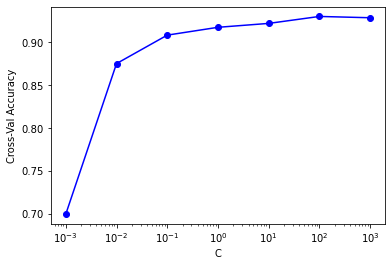

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = 10

C_values = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2,1e3]

cv_score = []

penalty = 'l1' # Lasso regularization
solver = 'liblinear'  # we need 'liblinear' to implement 'l1' norm
fit_intercept = True
multi_class = 'auto'

for C in C_values:
    


    log_reg = LogisticRegression(penalty = penalty, 
                                 solver = solver,
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)
    
    cross_val = cross_val_score(estimator = log_reg, X = X_train.values, y = y_train.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(np.array(C_values),np.array(cv_score),'bo-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cross-Val Accuracy')

In [25]:
penalty = 'l1' # Lasso regularization
solver = 'liblinear'  # we need 'liblinear' to implement 'l1' norm
C = 1e2
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                             solver = solver,
                             C = C, 
                             fit_intercept = fit_intercept, 
                             multi_class = multi_class)

log_reg.fit(X_train,y_train.values.ravel())

LogisticRegression(C=100.0, penalty='l1', solver='liblinear')

In [26]:
def get_lasso(log_reg,X):
    
    imortant_features = X.columns[np.where(log_reg.coef_[0] !=0)[0]]
    
    X = X[imortant_features]
    
    return X

In [27]:
X_train_lasso = get_lasso(log_reg,X_train)
X_test_lasso = get_lasso(log_reg,X_test)

In [28]:
X_train_lasso

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Continuous interest rate (after tax),Operating Expense Rate,...,Current Liability to Current Assets,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Net Income Flag
3012,0.264510,0.282961,0.393340,0.096762,0.097962,0.026759,0.028141,0.027933,0.028078,-0.616334,...,0.014113,0.305764,-0.015563,0.096830,0.077581,-0.236065,-0.043670,0.007248,0.105994,1.0
4039,-0.157370,-0.194372,-0.095403,0.698785,0.700615,0.021961,0.022011,0.020847,0.020082,-0.616334,...,-0.494187,-0.190910,0.108015,0.698953,-0.006843,-0.214531,0.012335,0.164614,0.003297,1.0
1658,1.468765,1.279932,1.597222,0.701990,0.703824,0.041512,0.048997,0.044916,0.047230,2.293367,...,-0.715715,1.230054,-0.291161,0.701798,0.196786,-0.328029,-0.047523,-0.013153,1.312757,1.0
152,-0.414339,-0.188939,-0.300304,0.243600,0.244954,0.012201,0.039074,0.039919,0.048658,-0.616334,...,2.145218,-0.077270,-0.086056,0.243545,0.016848,-0.155477,-0.039037,0.029051,-0.183323,1.0
3771,-0.087798,-0.260643,-0.153622,0.759953,0.738738,0.024721,0.018648,0.018186,0.015892,-0.616334,...,0.029869,-0.222964,0.001206,0.760001,-0.009449,-0.054667,0.006126,0.132281,-0.307069,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-1.023443,-1.159643,-1.046386,-0.876793,-0.876615,-0.004669,-0.027371,-0.024782,-0.030499,-0.616334,...,1.496318,-1.211811,-0.247154,-0.876787,-0.247861,0.049046,-0.069012,-0.261900,-0.434191,1.0
5191,-0.297201,-0.123479,-0.229158,-0.426859,-0.426209,0.022070,0.018179,0.019743,0.017881,-0.391529,...,0.173829,-0.077604,-0.096683,-0.426763,0.074271,0.626622,0.018645,0.167119,-0.612028,1.0
5226,-0.765367,-0.590403,-0.687721,-0.263240,-0.265503,0.013780,0.007592,0.005737,0.007188,-0.616334,...,0.255513,-0.670156,-0.096354,-0.263287,-0.135605,0.234883,-0.080415,-0.494088,-0.532214,1.0
5390,-0.332881,-0.026289,-0.291756,-0.271426,-0.265255,0.019309,0.029926,0.029437,0.020221,0.252291,...,-0.054831,0.061183,0.067152,-0.271521,0.049496,-0.110221,-0.045158,-0.000651,-0.232629,1.0


Lasso with C = 100, reduces the dataset from 95 to 78 features, with a cross-validation accuracy of ~93%. We can do a more detailed analysis of the classification performance of Logistic Regression fitted on 79 features by calculating precision, recall, f1, confusion matrix and plotting ROC curve for both the training and test datasets.

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,precision_recall_curve,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import confusion_matrix,plot_confusion_matrix


def plot_classification_performance(clf,X,y_true, step, binary):
   
    '''
    performance of classification is evaluated with:
    
    1) accuracy: (TP + TN)/(TP + TN + FP + FN)
    
    2) precision: TP / (TP + FP)
    
    3) recall (sensitivity, true positive rate): TP / (TP + FN)
    
    4) f_score: 2 * precision * recall / (precision + recall)
    
    5) precsion_recall_curve: x-axis: precision, y-axis: recall
    
    6) roc_curve: x-axis: true positive rate, y-axis: false positive rate
                
                true positive rate (recall, sensitivity): TP / (TP + FN)
                false positive rate (fall out, 1 - specificity): FP / (FP + TN) = 1 - specificity = 1 - TN / (TN + FP)
                
                specifity (or true negative rate): TN / (TN + FP) 
                
    ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
    
    Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
    
    ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
    
    7) confusion_matrix = [TP  FP
                           FN  TN]  
    
    '''
    
    accuracy = clf.score(X,y_true)
    
    if binary:
    
       
    
        y_pred = clf.predict(X)
        
        report = classification_report(y_true,y_pred)
        print('{} Classification Report'.format(step))
        print(report)
    
    
        plot_roc_curve(clf, X, y_true)
        plt.title('{} ROC curve'.format(step))
    
        plot_precision_recall_curve(clf, X, y_true)
        plt.title('{} Precision Recall curve'.format(step))
        
        
        plot_confusion_matrix(clf,X, y_true)
        plt.title('{} Confusion Matrix'.format(step))
        
    else:
        
        
        n_classes = len(clf.classes_)
        #y_score = clf.predict_proba(X)
        y_score = clf.decision_function(X)
        y_pred = clf.predict(X)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
    
        precision = dict()
        recall = dict()
        f_score = dict()
    
        y_true_dummies = pd.get_dummies(y_true, drop_first = False).values
    
        for i in range(n_classes):
        
            fpr[i], tpr[i], _ = roc_curve(y_true_dummies[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
            precision[i], recall[i],_ =  precision_recall_curve(y_true_dummies[:, i], y_score[:, i])
            
        report = classification_report(y_true,y_pred)
        print('{} Classification Report'.format(step))
        print(report)
                                                                
       
    
        figsize=(8, 5)
        fig, ax = plt.subplots(figsize = figsize)
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('{} ROC curve'.format(step))
        
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label = 'Class {} (area = {:.2f})'.format(i, roc_auc[i]))
    
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        sns.despine()
        plt.show()
    
        figsize=(8, 5)
        fig, ax = plt.subplots(figsize = figsize)

        ax.set_xlabel('Precision')
        ax.set_ylabel('Recall')
        ax.set_title('{} Precision Recall curve'.format(step))
        
        for i in range(n_classes):
            ax.plot(precision[i], recall[i], label = 'Class {}'.format(i))
        
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        sns.despine()
        plt.show()
    
        figsize=(8, 5)
        plot_confusion_matrix(clf,X,y_true)
        
        
    

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      2243
         1.0       0.91      0.95      0.93      1703

    accuracy                           0.94      3946
   macro avg       0.94      0.94      0.94      3946
weighted avg       0.94      0.94      0.94      3946



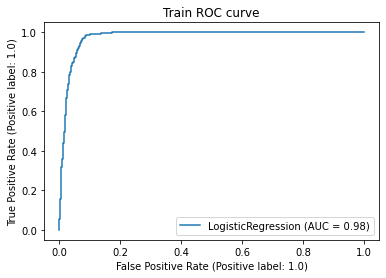

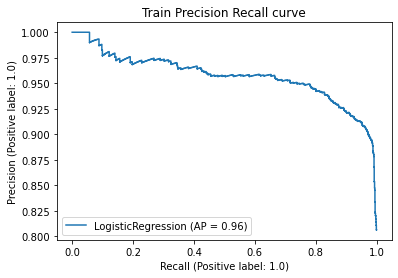

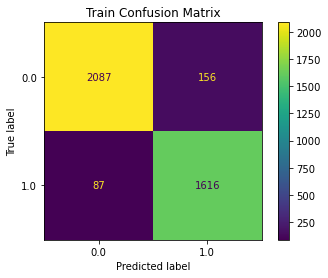

In [30]:
# train performance

# log_reg: logistic regression fitted with Lasso regularization with C = 100

plot_classification_performance(log_reg, X_train,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      1089
         1.0       0.89      0.96      0.92       856

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



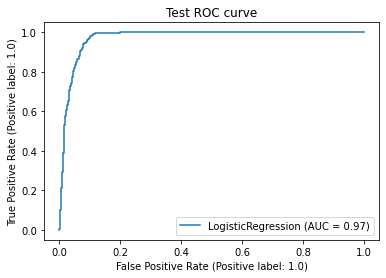

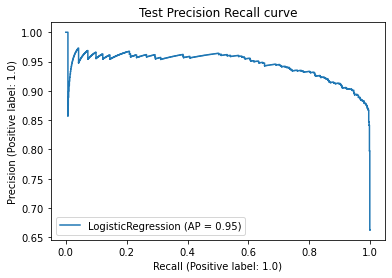

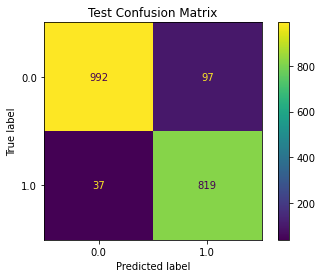

In [31]:
# test performance

# log_reg: logistic regression fitted with Lasso regularization with C = 100

plot_classification_performance(log_reg, X_test,y_test, step ='Test', binary = True)

## 3.2 Features Selection using Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

def get_RF_features_importances(rf,X,feature_threshold, plot):
    
    features_names = X.columns
    
    data = {'feature_name' : features_names,'feature_importance' : rf.feature_importances_}
    
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by = ['feature_importance'], ascending=False,inplace=True)
    
    selected_features = fi_df['feature_name'].values[:feature_threshold]
    
    X_rf = X[selected_features]
    
    if plot:

        #Define size of bar plot
        plt.figure(figsize = (10,8))
        #Plot Searborn bar chart
        sns.barplot(x = fi_df['feature_importance'], y = fi_df['feature_name'])
        #Add chart labels
        plt.title('Random Forest Feature Importance')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature Name')
    

    return X_rf

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RF Train Accuracy: 1.000
RF Test Accuracy: 0.984


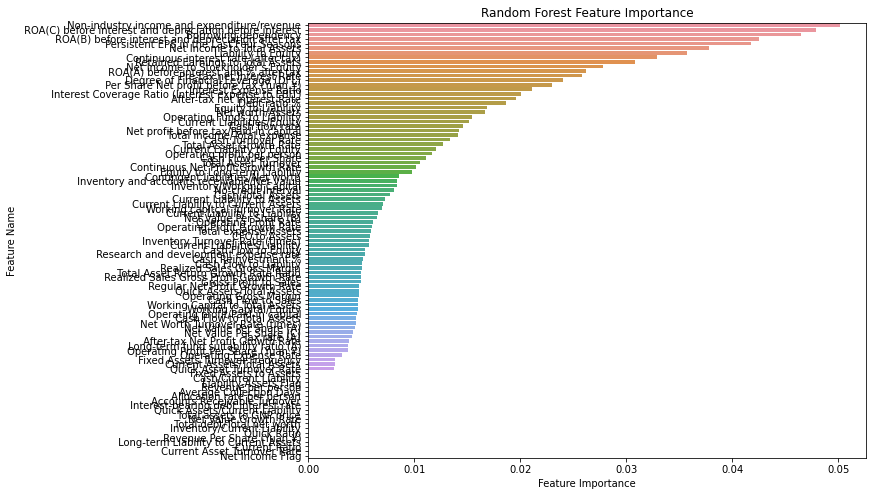

In [33]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print('RF Train Accuracy: {:.3f}'.format(train_acc))
print('RF Test Accuracy: {:.3f}'.format(test_acc))

feature_threshold = 20

X_train_rf = get_RF_features_importances(rf, X_train, feature_threshold, plot = True)
X_test_rf = get_RF_features_importances(rf, X_test, feature_threshold, plot = False)


In [34]:
X_train_rf

,Non-industry income and expenditure/revenue,ROA(C) before interest and depreciation before interest,Borrowing dependency,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Net Income to Total Assets,Liability to Equity,Continuous interest rate (after tax),Retained Earnings to Total Assets,Net Income to Stockholder's Equity,ROA(A) before interest and % after tax,Pre-tax net Interest Rate,Degree of Financial Leverage (DFL),Per Share Net profit before tax (Yuan ¥),Interest Expense Ratio,Interest Coverage Ratio (Interest expense to EBIT),After-tax net Interest Rate,Debt ratio %,Equity to Liability,Net worth/Assets
3012,-0.008555,0.264510,-0.192229,0.393340,-0.048760,0.305764,-0.236065,0.028078,0.031489,0.077581,0.282961,0.028141,-0.043670,-0.122032,-0.015024,0.007248,0.027933,-0.748326,0.105994,0.748326
4039,-0.009205,-0.157370,-0.124100,-0.095403,-0.367204,-0.190910,-0.214531,0.020082,-0.077484,-0.006843,-0.194372,0.022011,0.012335,-0.362633,0.166482,0.164614,0.020847,-0.606975,0.003297,0.606975
1658,-0.002536,1.468765,-0.289334,1.597222,2.080333,1.230054,-0.328029,0.047230,1.244762,0.196786,1.279932,0.048997,-0.047523,1.719052,-0.032028,-0.013153,0.044916,-1.483443,1.312757,1.483443
152,0.048976,-0.414339,-0.063876,-0.300304,-0.207945,-0.077270,-0.155477,0.048658,0.400436,0.016848,-0.188939,0.039074,-0.039037,-0.303644,-0.000030,0.029051,0.039919,-0.263856,-0.183323,0.263856
3771,-0.022706,-0.087798,0.105806,-0.153622,-0.391271,-0.222964,-0.054667,0.015892,0.006628,-0.009449,-0.260643,0.018648,0.006126,-0.342290,0.183204,0.132281,0.018186,0.143922,-0.307069,-0.143922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.043744,-1.023443,0.170593,-1.046386,-0.896361,-1.211811,0.049046,-0.030499,-0.993101,-0.247861,-1.159643,-0.027371,-0.069012,-0.795920,-0.190211,-0.261900,-0.024782,0.551968,-0.434191,-0.551968
5191,-0.017188,-0.297201,0.557652,-0.229158,-0.178282,-0.077604,0.626622,0.017881,-0.068848,0.074271,-0.123479,0.018179,0.018645,-0.228659,0.162176,0.167119,0.019743,1.667508,-0.612028,-1.667508
5226,-0.018291,-0.765367,0.318652,-0.687721,-0.680395,-0.670156,0.234883,0.007188,-0.288968,-0.135605,-0.590403,0.007592,-0.080415,-0.635980,-0.451594,-0.494088,0.005737,1.058155,-0.532214,-1.058155
5390,0.013201,-0.332881,-0.109253,-0.291756,-0.179428,0.061183,-0.110221,0.020221,0.564390,0.049496,-0.026289,0.029926,-0.045158,-0.081794,0.002336,-0.000651,0.029437,-0.083962,-0.232629,0.083962


In [35]:
rf = RandomForestClassifier()

rf.fit(X_train_rf, y_train)

train_acc = rf.score(X_train_rf, y_train)
test_acc = rf.score(X_test_rf, y_test)

print('RF Train Accuracy: {:.3f}'.format(train_acc))
print('RF Test Accuracy: {:.3f}'.format(test_acc))


/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RF Train Accuracy: 1.000
RF Test Accuracy: 0.969


With Random Forest, we have identified 20 features wich are importan to predict the target. Selecting a smaller number of features allows for a higher interpretability of the dataset. Comparison features selection with Lasso and Random Forest:

**Lasso**: C = 100, 78 filtered features, test accuracy: 0.93

**Random Forest**: 20 filtered features, test accuracy: 0.97

In [36]:
rf = RandomForestClassifier()

rf.fit(X_clean, y_clean)

X_rf = get_RF_features_importances(rf, X_clean, feature_threshold, plot = False)

X_rf



/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


,Persistent EPS in the Last Four Seasons,Continuous interest rate (after tax),Net Income to Stockholder's Equity,Non-industry income and expenditure/revenue,ROA(B) before interest and depreciation after tax,Net Income to Total Assets,ROA(C) before interest and depreciation before interest,Interest Coverage Ratio (Interest expense to EBIT),Borrowing dependency,Net worth/Assets,Degree of Financial Leverage (DFL),Per Share Net profit before tax (Yuan ¥),Liability to Equity,Interest Expense Ratio,Net profit before tax/Paid-in capital,Total income/Total expense,Current Liability to Equity,Retained Earnings to Total Assets,After-tax net Interest Rate,Cash Turnover Rate
0,-0.725295,-0.000649,0.017055,-0.001648,-0.887034,-0.071245,-1.001604,0.122961,-0.094642,0.348526,-0.009591,-0.358127,-0.171003,0.098311,-0.363502,-0.024164,-0.249706,-0.069537,0.022466,-0.726576
1,-0.284695,0.017960,0.020683,-0.016848,-0.165574,-0.111583,-0.231170,0.135348,0.162887,-0.583967,-0.003919,-0.303644,0.051737,0.123391,-0.306178,-0.022817,-0.021916,-0.179683,0.019173,0.972643
2,-0.259111,0.043577,0.033529,0.062400,-0.215989,0.065980,-0.268125,0.048529,-0.146560,0.962525,-0.034361,-0.246890,-0.266025,0.022094,-0.245180,0.000234,-0.292047,0.285008,0.049818,-0.841264
3,0.127480,0.027226,0.108891,-0.005762,0.443756,0.468192,0.507129,0.022809,-0.118472,0.638984,-0.040424,0.148114,-0.219564,0.006095,0.181075,-0.015547,-0.268638,0.552616,0.027732,-0.419267
4,-0.341546,0.017130,0.003713,-0.013968,-0.323773,-0.129146,-0.293030,0.027559,-0.210221,0.661974,-0.039373,-0.296833,-0.223089,0.024624,-0.298339,-0.025313,-0.242400,-0.045723,0.018886,2.048056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,-1.036054,-0.006887,-0.249109,-0.032516,-0.873999,-0.918729,-0.790710,-0.351908,0.628498,-1.431651,-0.079210,-0.914162,0.435061,-0.254469,-0.964250,-0.044311,0.250196,-0.478652,-0.001463,-0.483482
5887,-1.675793,-0.001917,-0.695192,-0.020604,-2.408959,-2.182521,-2.334983,-0.029220,-0.080517,-1.443184,-0.050262,-1.435023,0.456842,-0.044707,-1.512824,-0.045764,0.507896,-2.246030,0.001951,0.427595
5888,-1.335983,0.001189,-0.694375,-0.039404,-1.125861,-1.558877,-1.201531,-0.045964,0.816775,-2.054603,-0.052896,-1.548652,1.029883,-0.058947,-1.555471,-0.038909,1.187068,-1.061244,-0.000345,0.336918
5889,-0.747079,0.007296,-0.153436,-0.014071,-0.758080,-0.708792,-0.835464,-0.168515,0.271031,-1.211824,-0.067155,-0.710316,0.325519,-0.240546,-0.730143,-0.042125,0.388567,-0.350063,0.005753,-0.841264


<AxesSubplot:>

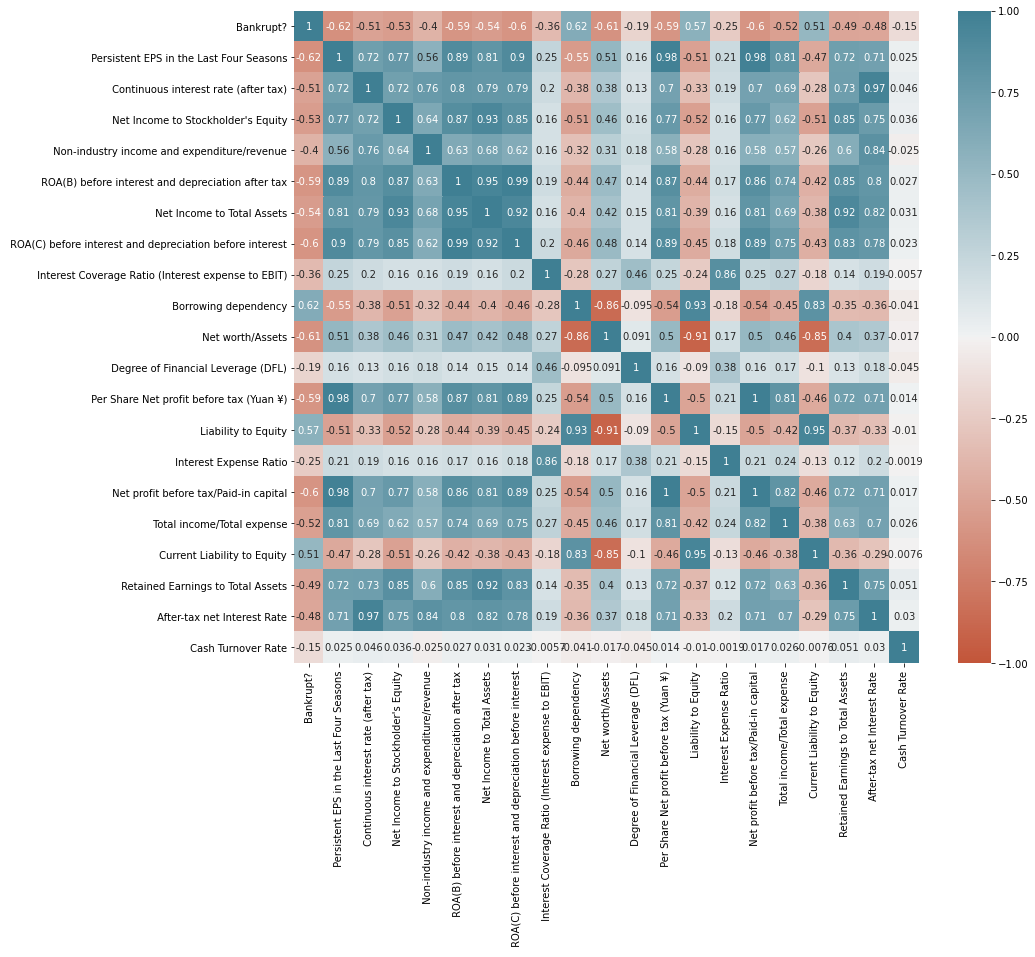

In [37]:
fig, ax = plt.subplots(figsize=(14,12))

sns.heatmap(pd.concat([y_clean,X_rf],axis = 1).corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

As expected, all the features extracted by Random Forest are correlated to the target. With the heatmap, we can identify some patterns in the data:

- decreasing Persistent EPS in the Last four Season, decreasing Continuous Interest rate (after tax): tendency to bankrupt

- decreasing ROA(B) before interest and depreciation after tax and Net Income to Total Sssets: tendency to bankrupt

- decreasing Net worth/Assets: tendency to bankrupt


The patterns can be visualized also in the pairwise scatterplots of the features in the datasets. The advantage of having reduced the dimensionality of the dataset with Random Forest is that now we can visualize the scatterplots of the relevant features only, which show better the pattern in the data.

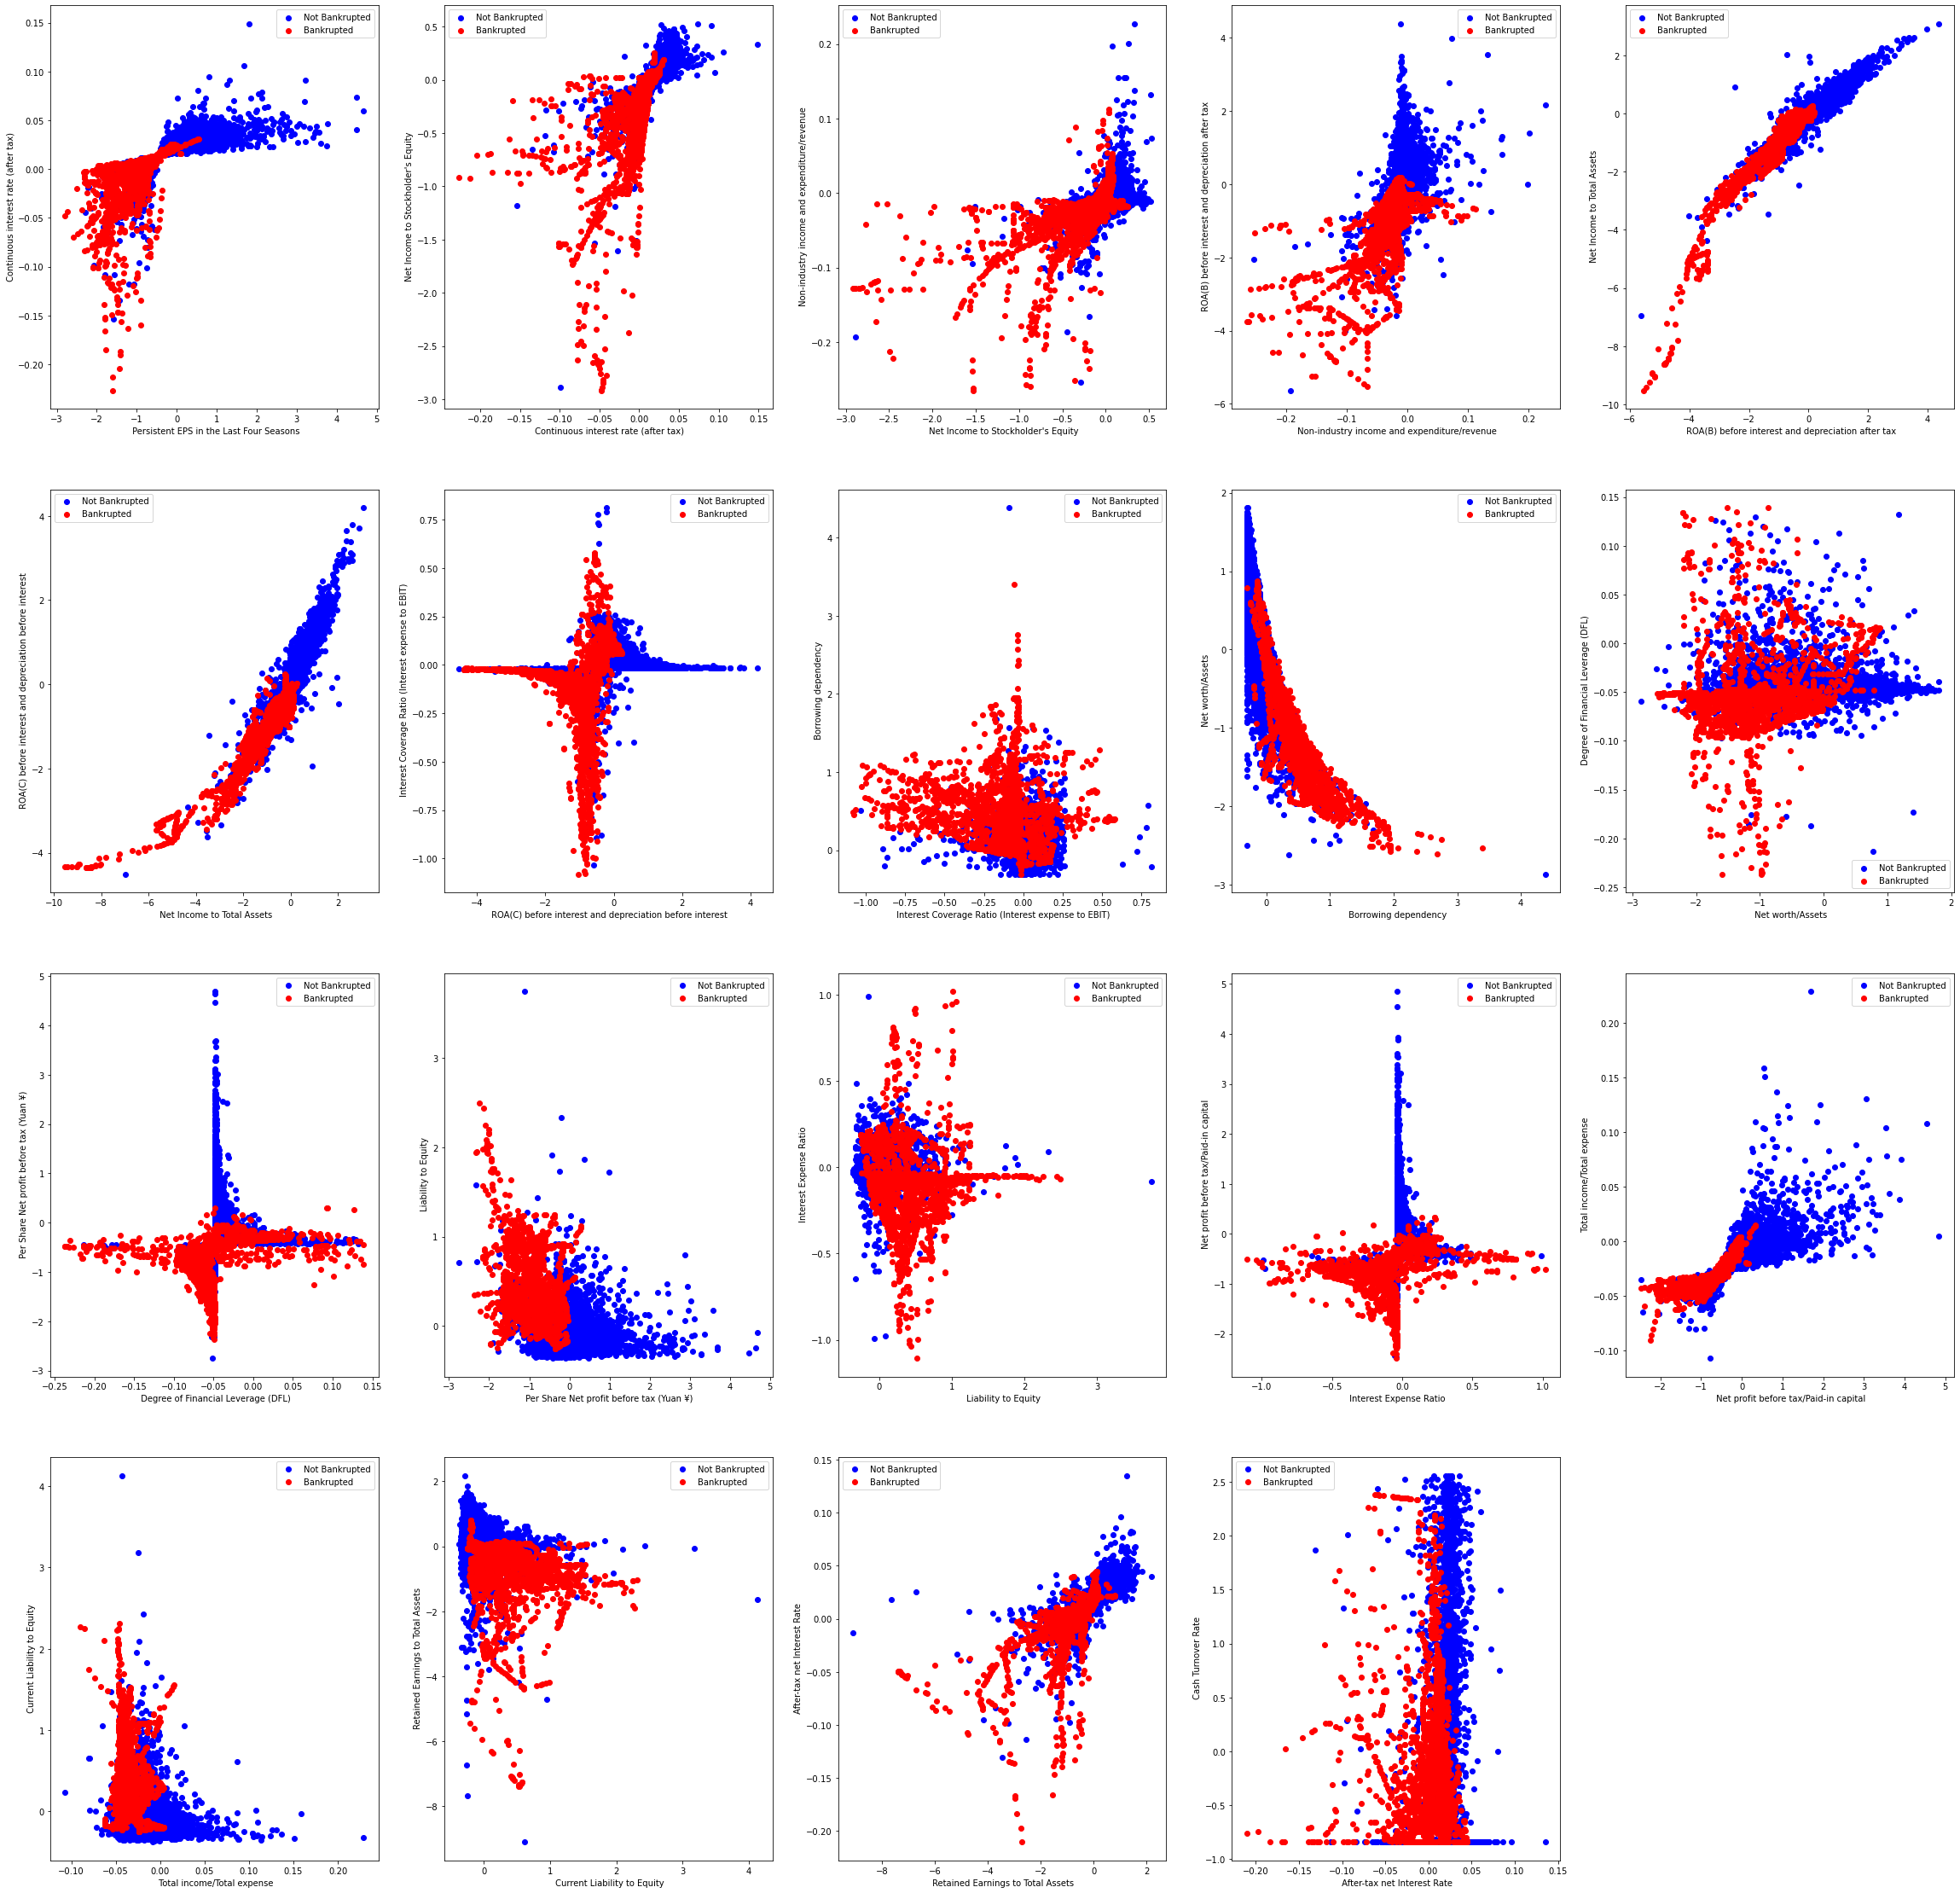

In [46]:
fig = plt.figure(figsize = (40,40))

for i in range(19):
    
    fig.add_subplot(4,5,i+1)
    
    ax_1 = i
    ax_2 = i+1
    

    plt.scatter(X_rf.values[np.where(y_clean == 0),ax_1],X_rf.values[np.where(y_clean == 0),ax_2], c = 'b')
    plt.scatter(X_rf.values[np.where(y_clean == 1),ax_1],X_rf.values[np.where(y_clean == 1),ax_2], c = 'r')
    plt.xlabel(X_rf.columns[ax_1])
    plt.ylabel(X_rf.columns[ax_2])
    plt.legend(['Not Bankrupted','Bankrupted'])

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2243
         1.0       1.00      1.00      1.00      1703

    accuracy                           1.00      3946
   macro avg       1.00      1.00      1.00      3946
weighted avg       1.00      1.00      1.00      3946



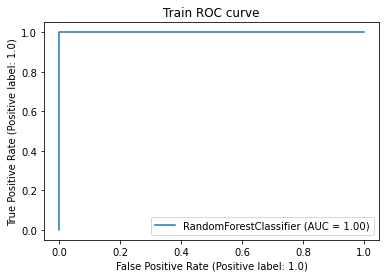

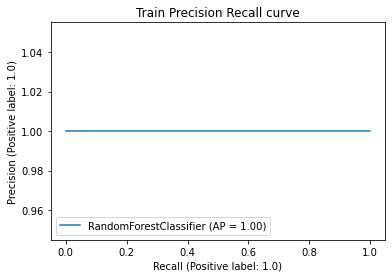

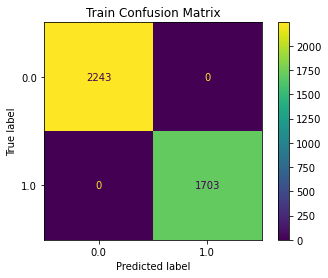

In [49]:
rf = RandomForestClassifier()

rf.fit(X_train_rf,y_train)

plot_classification_performance(rf, X_train_rf,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      1089
         1.0       0.95      0.98      0.97       856

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



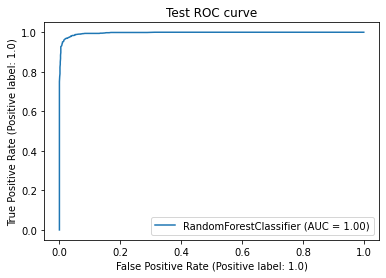

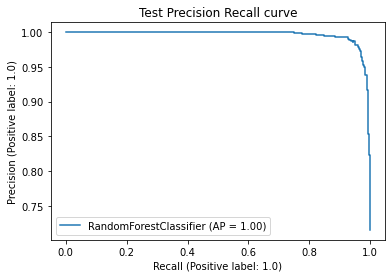

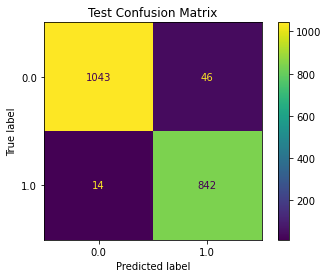

In [50]:
plot_classification_performance(rf, X_test_rf,y_test, step ='Test', binary = True)

# 4. Dimensionality Reduction

In [39]:
from sklearn.decomposition import PCA,KernelPCA

def get_pca(X, n_components):

    pca = PCA(n_components = n_components)

    pca.fit(X)

    X_pca = pca.fit_transform(X)

    X_pca = pd.DataFrame(X_pca)
    
    fn = []
    
    for i in range(n_components):
        
        fn.append('component ' + str(i + 1))
        
    X_pca.columns = fn
    
    pve = pca.explained_variance_ratio_
    
    for i in range(n_components):
    
        print('PVE component {}: {:.1f} %'.format(i + 1, pve[i] * 100))
    print('Cumulative PVE: {:.1f} %'.format(sum(pve)*100))
    
    return X_pca, pca, pve

# the biplot illustrates the loading vectors of each features and 
# the data plotted in the principal component space

# in an element phi_jm of the loading vector phi_m of the feature m associated with the feature j
# has a high positive value, it means that the feature j has a high contribution to the component m


def get_biplot(X_pca,comp_ax_hor,comp_ax_ver,features_names):
    
    score = X_pca.values
    coeff = np.transpose(pca.components_[[comp_ax_hor-1,comp_ax_ver-1], :])
    
    
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig = plt.figure(figsize = (10,10))
    plt.scatter(xs * scalex,ys * scaley,s=5)
    plt.xlabel('Component {}'.format(comp_ax_hor))
    plt.ylabel('Component {}'.format(comp_ax_ver))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if features_names is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, features_names[i], color = 'g', ha = 'center', va = 'center')

In [40]:
n_components = 20

X_train_pca, pca, pve= get_pca(X_train_rf,n_components)
X_test_pca = pca.fit_transform(X_test_rf)

PVE component 1: 74.9 %
PVE component 2: 17.2 %
PVE component 3: 3.5 %
PVE component 4: 1.4 %
PVE component 5: 0.9 %
PVE component 6: 0.7 %
PVE component 7: 0.6 %
PVE component 8: 0.2 %
PVE component 9: 0.2 %
PVE component 10: 0.1 %
PVE component 11: 0.1 %
PVE component 12: 0.1 %
PVE component 13: 0.0 %
PVE component 14: 0.0 %
PVE component 15: 0.0 %
PVE component 16: 0.0 %
PVE component 17: 0.0 %
PVE component 18: 0.0 %
PVE component 19: 0.0 %
PVE component 20: 0.0 %
Cumulative PVE: 100.0 %


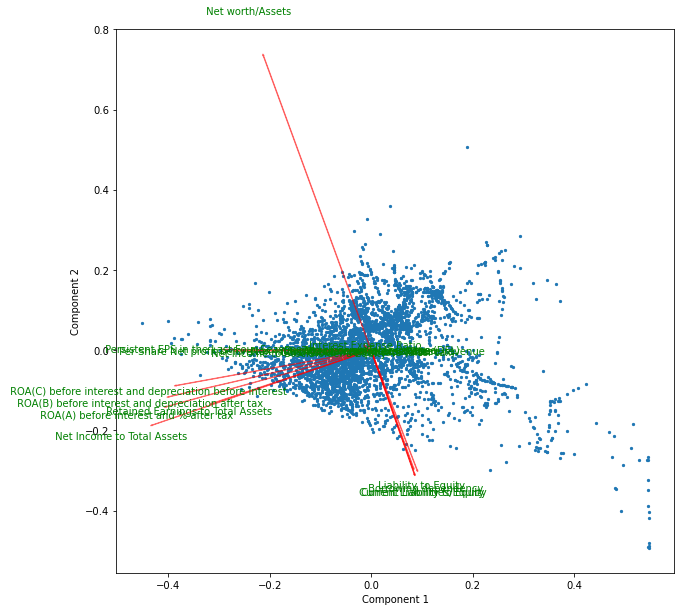

In [81]:
comp_ax_hor = 1

comp_ax_ver = 2

features_names = X_train_rf.columns

get_biplot(X_train_pca,comp_ax_hor, comp_ax_ver, features_names )